## To predict how long a patient will stay in the hospital

In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the data ready

patient_data = pd.read_csv("NY2017.csv")
patient_data

C:\Users\maximus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343564,Hudson Valley,Rockland,4329000.0,779.0,Good Samaritan Hospital of Suffern,50 to 69,109,F,White,Not Span/Hispanic,...,Moderate,Surgical,Private Health Insurance,Medicare,NaN,NaN,N,N,87545.08,16781.23
2343565,Hudson Valley,Rockland,4329000.0,779.0,Good Samaritan Hospital of Suffern,50 to 69,109,F,Other Race,Spanish/Hispanic,...,Moderate,Medical,Medicaid,NaN,NaN,NaN,N,Y,31896.05,6003.38
2343566,Hudson Valley,Rockland,4329000.0,779.0,Good Samaritan Hospital of Suffern,30 to 49,NaN,M,Other Race,Not Span/Hispanic,...,Minor,Medical,Miscellaneous/Other,Medicaid,NaN,NaN,N,Y,49292.49,8863.14
2343567,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,F,Black/African American,Unknown,...,Minor,Surgical,Medicare,NaN,NaN,NaN,N,N,66399.81,13068.87


In [3]:
# Describe the data by getting datatype of ech column
patient_data.dtypes

Hospital Service Area                   object
Hospital County                         object
Operating Certificate Number           float64
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [56]:
patient_data.columns

Index(['Hospital County', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description'],
      dtype='object')

In [57]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 19 columns):
 #   Column                               Dtype 
---  ------                               ----- 
 0   Hospital County                      object
 1   Age Group                            object
 2   Gender                               object
 3   Race                                 object
 4   Ethnicity                            object
 5   Length of Stay                       object
 6   Type of Admission                    object
 7   CCS Diagnosis Code                   int64 
 8   CCS Diagnosis Description            object
 9   CCS Procedure Code                   int64 
 10  CCS Procedure Description            object
 11  APR DRG Code                         int64 
 12  APR DRG Description                  object
 13  APR MDC Code                         int64 
 14  APR MDC Description                  object
 15  APR Severity of Illness Code         int64 
 16  

In [4]:
# Describe data to give us a quick statistical overview of the numerical columns.
patient_data.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,2.338414e+06,2.338414e+06,2343569.0,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06,2.343569e+06
mean,4.985786e+06,1.038981e+03,2017.0,1.898732e+02,1.013995e+02,4.161805e+02,1.031093e+01,2.020746e+00,4.972380e+04,1.664735e+04
std,2.263244e+06,7.202281e+02,0.0,1.649453e+02,8.681581e+01,2.424942e+02,5.900304e+00,8.891484e-01,9.524129e+04,4.377389e+04
min,1.010000e+05,1.000000e+00,2017.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,2017.0,1.010000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.353980e+04,4.784650e+03
50%,5.904001e+06,1.097000e+03,2017.0,1.570000e+02,9.800000e+01,3.830000e+02,9.000000e+00,2.000000e+00,2.657496e+04,8.924510e+03
75%,7.002017e+06,1.453000e+03,2017.0,2.180000e+02,1.800000e+02,6.400000e+02,1.500000e+01,3.000000e+00,5.310669e+04,1.728076e+04
max,7.004010e+06,9.431000e+03,2017.0,2.617000e+03,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.696645e+06,8.868613e+06


In [14]:
# Making sure the rows of the required data has no missing value(s)
patient_data.isna().sum()

Hospital Service Area                     5155
Hospital County                           5155
Operating Certificate Number              5155
Permanent Facility Id                     5155
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      39019
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

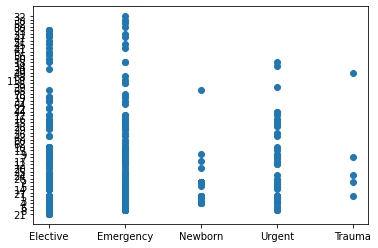

In [60]:
fig, ax = plt.subplots()
ax.scatter(patient_data["Type of Admission"][:1000], patient_data["Length of Stay"][:1000])

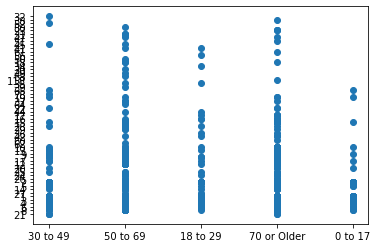

In [61]:
fig, ax = plt.subplots()
ax.scatter(patient_data["Age Group"][:1000], patient_data["Length of Stay"][:1000])

In [62]:
patient_data.head().T

,0,1,2,3,4
Hospital County,Westchester,Westchester,Westchester,Westchester,Westchester
Age Group,30 to 49,50 to 69,30 to 49,50 to 69,18 to 29
Gender,M,M,F,F,F
Race,White,White,White,White,White
Ethnicity,Not Span/Hispanic,Spanish/Hispanic,Unknown,Not Span/Hispanic,Spanish/Hispanic
Length of Stay,21,8,6,4,4
Type of Admission,Elective,Emergency,Emergency,Emergency,Emergency
CCS Diagnosis Code,659,99,161,238,2
CCS Diagnosis Description,Schizophrenia and other psychotic disorders,Hypertension with complications and secondary ...,Other diseases of kidney and ureters,Complications of surgical procedures or medica...,Septicemia (except in labor)
CCS Procedure Code,0,108,102,222,0


In [20]:
#Dropping the datas thst are not needed,
#and setting inplace to true to effect the change

patient_data.drop(columns=['Hospital Service Area',
                           'Patient Disposition',
                           'Operating Certificate Number',
                           'Permanent Facility Id',
                           'Facility Name','Zip Code - 3 digits',
                           'Discharge Year',
                           'Payment Typology 1','Payment Typology 2',
                           'Payment Typology 3','Birth Weight',
                           'Abortion Edit Indicator',
                           'Emergency Department Indicator',
                           'Total Charges','Total Costs'], inplace=True)

In [21]:
#Create X (features matrix)
x = patient_data.drop("Length of Stay", axis=1)

# create y (labels)
y = patient_data["Length of Stay"]

In [31]:
##Splitting into training and test data

from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [32]:
# Choosing the right model and hyperparameters
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100)

#Keeping the default hyperparameters for now
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
#Check missing values
x.isna().sum()

Hospital County                        5155
Age Group                                 0
Gender                                    0
Race                                      0
Ethnicity                                 0
Type of Admission                         0
CCS Diagnosis Code                        0
CCS Diagnosis Description                 0
CCS Procedure Code                        0
CCS Procedure Description                 0
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description                       0
APR Severity of Illness Code              0
APR Severity of Illness Description     240
APR Risk of Mortality                   240
APR Medical Surgical Description          0
dtype: int64

In [35]:
# Filling missingh values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and Numerical values with "mean"
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")


# Define the column
cat_features = ["APR Severity of Illness Description",
               "APR Risk of Mortality",
               "Hospital County"]


# Since we have one coloumn we only define thatg column
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features)
])

# Fill train and testing values differently
filled_X_train = imputer.fit_transform(x_train)
filled_X_test = imputer.transform(x_test)

#checking to confirm filled x train
filled_x_train

array([['Major', 'Major', 'Suffolk'],
       ['Moderate', 'Minor', 'Erie'],
       ['Minor', 'Moderate', 'Albany'],
       ...,
       ['Minor', 'Minor', 'Schenectady'],
       ['Major', 'Major', 'Kings'],
       ['Major', 'Major', 'Rockland']], dtype=object)

In [50]:
# Getting the transformed data array's back into DataFrame's
patient_data_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["APR Severity of Illness Description",
                                               "APR Risk of Mortality", "Hospital County"])

patient_data_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["APR Severity of Illness Description",
                                               "APR Risk of Mortality", "Hospital County"])

# Check missing data in training set
patient_data_filled_train.isna().sum()

APR Severity of Illness Description    0
APR Risk of Mortality                  0
Hospital County                        0
dtype: int64

In [51]:
# Check to see the original data with missing values..
patient_data.isna().sum()

Hospital County                        5155
Age Group                                 0
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
CCS Diagnosis Code                        0
CCS Diagnosis Description                 0
CCS Procedure Code                        0
CCS Procedure Description                 0
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description                       0
APR Severity of Illness Code              0
APR Severity of Illness Description     240
APR Risk of Mortality                   240
APR Medical Surgical Description          0
dtype: int64

In [52]:
patient_data.head()

,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description
0,Westchester,30 to 49,M,White,Not Span/Hispanic,21,Elective,659,Schizophrenia and other psychotic disorders,0,NO PROC,750,Schizophrenia,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical
1,Westchester,50 to 69,M,White,Spanish/Hispanic,8,Emergency,99,Hypertension with complications and secondary ...,108,INDWELLING CATHETER,194,Heart failure,5,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical
2,Westchester,30 to 49,F,White,Unknown,6,Emergency,161,Other diseases of kidney and ureters,102,URETERAL CATHETERIZATN,465,Urinary stones & acquired upper urinary tract ...,11,Diseases and Disorders of the Kidney and Urina...,2,Moderate,Moderate,Medical
3,Westchester,50 to 69,F,White,Not Span/Hispanic,4,Emergency,238,Complications of surgical procedures or medica...,222,BLOOD TRANSFUSION,721,"Post-operative, post-traumatic, other device i...",18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Moderate,Medical
4,Westchester,18 to 29,F,White,Spanish/Hispanic,4,Emergency,2,Septicemia (except in labor),0,NO PROC,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",2,Moderate,Minor,Medical


In [53]:
# I converted onvert data to numbers
# Turning the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# I one hot encode the features
categorical_features = ["Hospital County", "APR Severity of Illness Description", "APR Risk of Mortality",
                        ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(patient_data_filled_train)
transformed_X_test = transformer.transform(patient_data_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
len(patient_data)

2343569

# First thing was to identify the type of problem and I realised its a regression problem

* I looked at the scikit learn map to pick the model right for my problem
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


* After carefully looking at my samples i discovered it's higher thann a 100k samples, and according to the map, I used SGD REGRESSOR